<a href="https://colab.research.google.com/github/AnitaTasnim/GNN_attack_model/blob/main/GCN_in_cora_deep_robust_modified_sdrf_attack_with_randomness_in_addition_ipynb_10_percent__(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import torch

if torch.cuda.is_available():
    # Code to run when CUDA is available (for GPU)
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    # Code to run when CUDA is not available (for CPU)
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

# Now you can use `device` to specify whether you want to use GPU or CPU for your code.


CUDA is available. Using GPU.


In [2]:
#https://deeprobust.readthedocs.io/en/latest/notes/installation.html

In [3]:
!git clone https://github.com/DSE-MSU/DeepRobust.git
%cd DeepRobust
!python setup.py install

Cloning into 'DeepRobust'...
remote: Enumerating objects: 5822, done.
remote: Counting objects: 100% (1534/1534), done.
remote: Compressing objects: 100% (636/636), done.
remote: Total 5822 (delta 961), reused 1455 (delta 890), pack-reused 4288
Receiving objects: 100% (5822/5822), 12.08 MiB | 26.95 MiB/s, done.
Resolving deltas: 100% (3824/3824), done.
/content/DeepRobust
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/p

In [4]:
import numpy as np

In [5]:
import random

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00


In [8]:
from torch_geometric.utils import add_self_loops, remove_self_loops

In [9]:
from torch_geometric.data import Data

##using deeprobust load cora dataset

In [10]:
from deeprobust.graph.data import Dataset
#laoding cora dataset
data = Dataset(root = '/tmp/', name = 'cora', seed = 15) # root directory where the dataset should be saved.
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

Loading cora dataset...
Done!
Selecting 1 largest connected components



In the given code snippet, the variables adj, features, and labels are assigned values from the data object. Here's an explanation of each variable:

adj: This variable represents the adjacency matrix of a graph. In graph theory, an adjacency matrix is a square matrix that represents the connections between nodes in a graph. It provides a binary representation of the edges between nodes, where each element adj[i, j] indicates whether there is an edge between nodes i and j. The adj variable stores this adjacency matrix, which describes the structure of the graph.

features: This variable contains the features or attributes associated with each node in the graph.



In [11]:
from deeprobust.graph.data import Dataset, PrePtbDataset
'''# You can either use setting='prognn' or seed=15 to get the prognn splits
data = Dataset(root='/tmp/', name='cora', setting='prognn')
data = Dataset(root='/tmp/', name='cora', seed=15) # since the attacked graph are generated under seed 15
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test
# Load meta attacked data
perturbed_data = PrePtbDataset(root='/tmp/',
                                        name='cora',
                                        attack_method='meta',
                                        ptb_rate=0.05)
perturbed_adj = perturbed_data.adj'''

"# You can either use setting='prognn' or seed=15 to get the prognn splits\ndata = Dataset(root='/tmp/', name='cora', setting='prognn')\ndata = Dataset(root='/tmp/', name='cora', seed=15) # since the attacked graph are generated under seed 15\nadj, features, labels = data.adj, data.features, data.labels\nidx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test\n# Load meta attacked data\nperturbed_data = PrePtbDataset(root='/tmp/',\n                                        name='cora',\n                                        attack_method='meta',\n                                        ptb_rate=0.05)\nperturbed_adj = perturbed_data.adj"

In [12]:
#!pip install torch-geometric

In [13]:
from deeprobust.graph.data import Dataset
from deeprobust.graph.defense import GCN

No module named 'torch_sparse'


/content/DeepRobust/deeprobust/graph/defense/__init__.py:15: UserWarning: Please install pytorch geometric if you would like to use the datasets from pytorch geometric. See details in https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html
  warnings.warn("Please install pytorch geometric if you " +


In [14]:
import torch
print(torch.__version__)

2.1.0+cu118


#Converting Graph Data between DeepRobust and PyTorch Geometric

In [15]:
from deeprobust.graph.data import Dataset, Dpr2Pyg, Pyg2Dpr

data = Dataset(root='/tmp/', name='cora',seed=15) # load clean graph
pyg_data = Dpr2Pyg(data) # convert dpr to pyg
print(pyg_data)
print(pyg_data[0])
#dpr_data = Pyg2Dpr(pyg_data) # convert pyg to dpr
#print(dpr_data.adj)

Loading cora dataset...
Selecting 1 largest connected components
Dpr2Pyg()
Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])


Processing...
/content/DeepRobust/deeprobust/graph/data/pyg_dataset.py:48: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edge_index = torch.LongTensor(dpr_data.adj.nonzero())
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [16]:
pyg_data[0]

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [17]:
pyg_data[0]

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [18]:
graph = pyg_data[0]
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [19]:
graph.edge_index.T #connected node pairs

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [2484, 1184],
        [2484, 1255],
        [2484, 1894]])

In [20]:
adj = graph.edge_index.t() ## Get the adjacency matrix,
adj

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [2484, 1184],
        [2484, 1255],
        [2484, 1894]])

In [21]:
graph.edge_index

tensor([[   0,    0,    0,  ..., 2484, 2484, 2484],
        [1084, 1104, 1288,  ..., 1184, 1255, 1894]])

In [22]:
features = graph.x
print(features)
labels = graph.y
print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 2, 0,  ..., 2, 2, 2])


In [23]:
print(f"Number of edges: {adj.size(0)}")


Number of edges: 10138


In [24]:
graph.num_nodes

2485

In [25]:
graph.num_edges

10138

In [26]:
print(f'Actual number of edges: {graph.num_edges // 2}')
 # Divide by 2 because the graph is undirected

Actual number of edges: 5069


###degree info

In [27]:
# Get the edge index
edge_index = graph.edge_index

# Calculate the degree for each node
degree = torch.zeros(graph.num_nodes, dtype=torch.long)
for edge in edge_index.T:
    degree[edge[0]] += 1  # Increment the degree of the first node of the edge
    degree[edge[1]] += 1  # Increment the degree of the second node of the edge

# Now, 'degree' contains the degree of each node in the graph
print(degree)

tensor([10,  8,  2,  ..., 12, 10,  6])


In [28]:
import torch

# Assuming you have already calculated the degree as shown in the previous code

# Find nodes with degree less than or equal to 2
nodes_with_low_degree = torch.where(degree <= 2)[0]

# Now, 'nodes_with_low_degree' contains the indices of nodes with degree less than or equal to 2
print("Nodes with degree less than or equal to 2:", nodes_with_low_degree)


Nodes with degree less than or equal to 2: tensor([   2,    7,   12,   17,   47,   48,   51,   55,   72,   80,   81,   88,
          96,  100,  104,  106,  109,  111,  113,  119,  130,  158,  159,  166,
         172,  175,  178,  193,  197,  198,  199,  201,  205,  206,  220,  227,
         234,  236,  237,  241,  248,  249,  259,  260,  274,  281,  292,  295,
         304,  307,  308,  310,  315,  319,  320,  321,  325,  328,  336,  339,
         342,  345,  348,  350,  356,  359,  360,  364,  366,  378,  387,  389,
         391,  394,  397,  402,  403,  405,  408,  414,  425,  427,  431,  435,
         437,  439,  440,  442,  443,  453,  454,  458,  459,  465,  466,  468,
         485,  487,  488,  491,  492,  495,  510,  515,  516,  518,  529,  532,
         535,  536,  539,  540,  541,  551,  553,  558,  559,  561,  562,  563,
         564,  567,  571,  583,  584,  601,  606,  609,  619,  623,  624,  625,
         630,  631,  634,  637,  639,  653,  655,  656,  662,  663,  664,  66

In [29]:
len(nodes_with_low_degree)

354

In [30]:
import torch

# Assuming you have already calculated the degree as shown in the previous code

# Find nodes with degree less than or equal to 1
nodes_with_low_degree_1 = torch.where(degree == 2)[0]

# Now, 'nodes_with_low_degree' contains the indices of nodes with degree less than or equal to 2
print("Nodes with degree less than or equal to 1:", nodes_with_low_degree_1)


Nodes with degree less than or equal to 1: tensor([   2,    7,   12,   17,   47,   48,   51,   55,   72,   80,   81,   88,
          96,  100,  104,  106,  109,  111,  113,  119,  130,  158,  159,  166,
         172,  175,  178,  193,  197,  198,  199,  201,  205,  206,  220,  227,
         234,  236,  237,  241,  248,  249,  259,  260,  274,  281,  292,  295,
         304,  307,  308,  310,  315,  319,  320,  321,  325,  328,  336,  339,
         342,  345,  348,  350,  356,  359,  360,  364,  366,  378,  387,  389,
         391,  394,  397,  402,  403,  405,  408,  414,  425,  427,  431,  435,
         437,  439,  440,  442,  443,  453,  454,  458,  459,  465,  466,  468,
         485,  487,  488,  491,  492,  495,  510,  515,  516,  518,  529,  532,
         535,  536,  539,  540,  541,  551,  553,  558,  559,  561,  562,  563,
         564,  567,  571,  583,  584,  601,  606,  609,  619,  623,  624,  625,
         630,  631,  634,  637,  639,  653,  655,  656,  662,  663,  664,  66

In [31]:
len(nodes_with_low_degree_1)

354

#visualise PyG

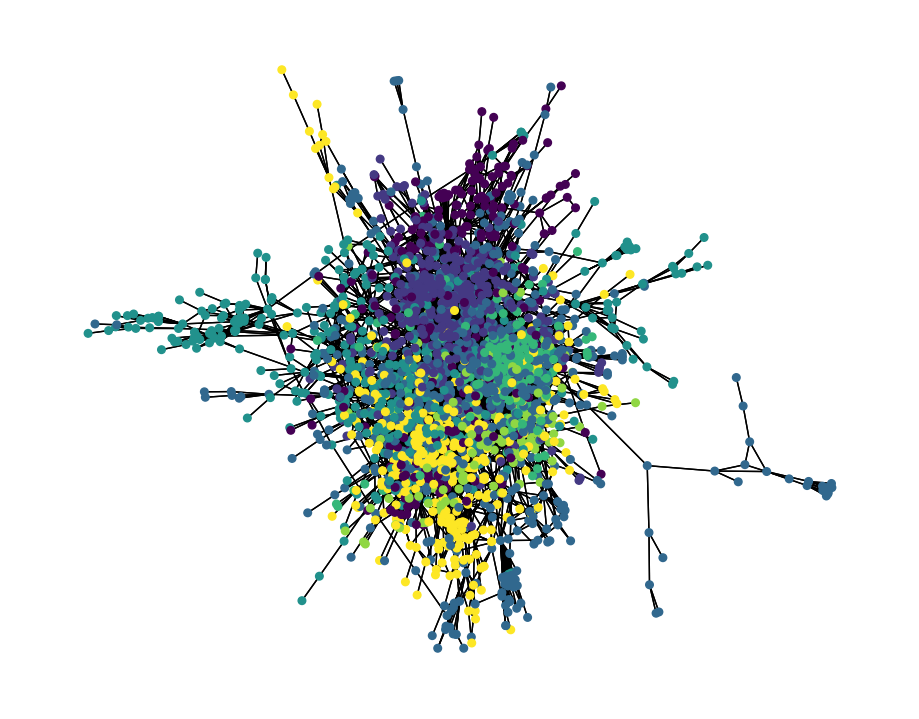

In [ ]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx

def convert_to_networkx(graph, n_sample=None):

    G = to_networkx(graph, node_attrs=["x"])
    y = graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        G = G.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return G, y


def plot_graph(G, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(G, node_size=30, arrows=False, node_color=y)
    plt.show()


A, y = convert_to_networkx(graph)
plot_graph(A, y)

#calculate balanced forman ricci curvature

In [32]:
def softmax(a, tau=1):
    exp_a = np.exp(a * tau)
    return exp_a / exp_a.sum()

In [33]:
!pip install numba numpy torch torch-geometric networkx


In [34]:
import math
from numba import cuda
import numpy as np
import torch
from torch_geometric.utils import (
    to_networkx,
    from_networkx,
    to_dense_adj,
    remove_self_loops,
    to_undirected,
)

In [35]:



@cuda.jit(
    "void(float32[:,:], float32[:,:], float32[:], float32[:], int32, float32[:,:])"
)
def _balanced_forman_curvature(A, A2, d_in, d_out, N, C):
    #print('_balanced_forman_curvature working')
    i, j = cuda.grid(2)

    if (i < N) and (j < N):
        if A[i, j] == 0:
            C[i, j] = 0
            return

        if d_in[i] > d_out[j]:
            d_max = d_in[i]
            d_min = d_out[j]
        else:
            d_max = d_out[j]
            d_min = d_in[i]

        if d_max * d_min == 0:
            C[i, j] = 0
            return

        sharp_ij = 0
        lambda_ij = 0
        for k in range(N):
            TMP = A[k, j] * (A2[i, k] - A[i, k]) * A[i, j]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

            TMP = A[i, k] * (A2[k, j] - A[k, j]) * A[i, j]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

        C[i, j] = (
            (2 / d_max) + (2 / d_min) - 2 + (2 / d_max + 1 / d_min) * A2[i, j] * A[i, j]
        )
        if lambda_ij > 0:
            C[i, j] += sharp_ij / (d_max * lambda_ij)


def balanced_forman_curvature(A, C=None):
    #print('balanced_forman_curvature')
    N = A.shape[0]
    A2 = torch.matmul(A, A)
    d_in = A.sum(axis=0)
    d_out = A.sum(axis=1)
    if C is None:
        C = torch.zeros(N, N).cuda()

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(N / threadsperblock[0])
    blockspergrid_y = math.ceil(N / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    _balanced_forman_curvature[blockspergrid, threadsperblock](A, A2, d_in, d_out, N, C)
    return C


@cuda.jit(
    "void(float32[:,:], float32[:,:], float32, float32, int32, float32[:,:], int32, int32, int32[:], int32[:], int32, int32)"
)
def _balanced_forman_post_delta(
    A, A2, d_in_x, d_out_y, N, D, x, y, i_neighbors, j_neighbors, dim_i, dim_j
):
    #print('_balanced_forman_post_delta working')
    I, J = cuda.grid(2)

    if (I < dim_i) and (J < dim_j):
        i = i_neighbors[I]
        j = j_neighbors[J]

        if (i == j) or (A[i, j] != 0):
            D[I, J] = -1000
            return

        # Difference in degree terms
        if j == x:
            d_in_x += 1
        elif i == y:
            d_out_y += 1

        if d_in_x * d_out_y == 0:
            D[I, J] = 0
            return

        if d_in_x > d_out_y:
            d_max = d_in_x
            d_min = d_out_y
        else:
            d_max = d_out_y
            d_min = d_in_x

        # Difference in triangles term
        A2_x_y = A2[x, y]
        if (x == i) and (A[j, y] != 0):
            A2_x_y += A[j, y]
        elif (y == j) and (A[x, i] != 0):
            A2_x_y += A[x, i]

        # Difference in four-cycles term
        sharp_ij = 0
        lambda_ij = 0
        for z in range(N):
            A_z_y = A[z, y] + 0
            A_x_z = A[x, z] + 0
            A2_z_y = A2[z, y] + 0
            A2_x_z = A2[x, z] + 0

            if (z == i) and (y == j):
                A_z_y += 1
            if (x == i) and (z == j):
                A_x_z += 1
            if (z == i) and (A[j, y] != 0):
                A2_z_y += A[j, y]
            if (x == i) and (A[j, z] != 0):
                A2_x_z += A[j, z]
            if (y == j) and (A[z, i] != 0):
                A2_z_y += A[z, i]
            if (z == j) and (A[x, i] != 0):
                A2_x_z += A[x, i]

            TMP = A_z_y * (A2_x_z - A_x_z) * A[x, y]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

            TMP = A_x_z * (A2_z_y - A_z_y) * A[x, y]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

        D[I, J] = (
            (2 / d_max) + (2 / d_min) - 2 + (2 / d_max + 1 / d_min) * A2_x_y * A[x, y]
        )
        if lambda_ij > 0:
            D[I, J] += sharp_ij / (d_max * lambda_ij)


def balanced_forman_post_delta(A, x, y, i_neighbors, j_neighbors, D=None):
    #print('balanced_forman_post_delta working')
    N = A.shape[0]
    A2 = torch.matmul(A, A)
    d_in = A[:, x].sum()
    d_out = A[y].sum()
    if D is None:
        D = torch.zeros(len(i_neighbors), len(j_neighbors)).cuda()

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(D.shape[0] / threadsperblock[0])
    blockspergrid_y = math.ceil(D.shape[1] / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    _balanced_forman_post_delta[blockspergrid, threadsperblock](
        A,
        A2,
        d_in,
        d_out,
        N,
        D,
        x,
        y,
        np.array(i_neighbors),
        np.array(j_neighbors),
        D.shape[0],
        D.shape[1],
    )
    return D

#SDRF algo

In [36]:
import numpy as np
import torch
from torch_geometric.utils import (
    to_networkx,
    from_networkx,
    to_undirected,
    remove_self_loops,
    to_dense_adj,
)


#***`attack`***

In [37]:
print(f"Number of edges: {adj.size(0)}")


Number of edges: 10138


In [38]:
i = 10
number_of_edge = 10138
loop_sdrf = int(number_of_edge*(i/100))
int(loop_sdrf)

1013



```
# Calculate degrees of each node (sum of row values in the adjacency matrix)
degrees = np.array(adj.sum(axis=1)).flatten()
print("Degrees of Each Node:")
for i, degree in enumerate(degrees):
    print(f"Node {i}: Degree {degree}")

# Store degrees in an array for further use
degrees = degrees.tolist()  # Convert the NumPy array to a Python list

# Access the degree of a specific node (e.g., node 400)
node_id = 400
print(f"Degree of Node {node_id}: {degrees[node_id]}")

```





The code defines a modified graph modification algorithm (`modified_sdrf`). It adds and potentially removes edges in an input graph to create bottlenecks. Key steps include calculating balanced Forman curvature, selecting edges and neighbors, and tracking added and removed edges. The function returns the modified graph and lists of added and removed edges. This version enhances understanding by providing insight into edge-level changes made during the process.

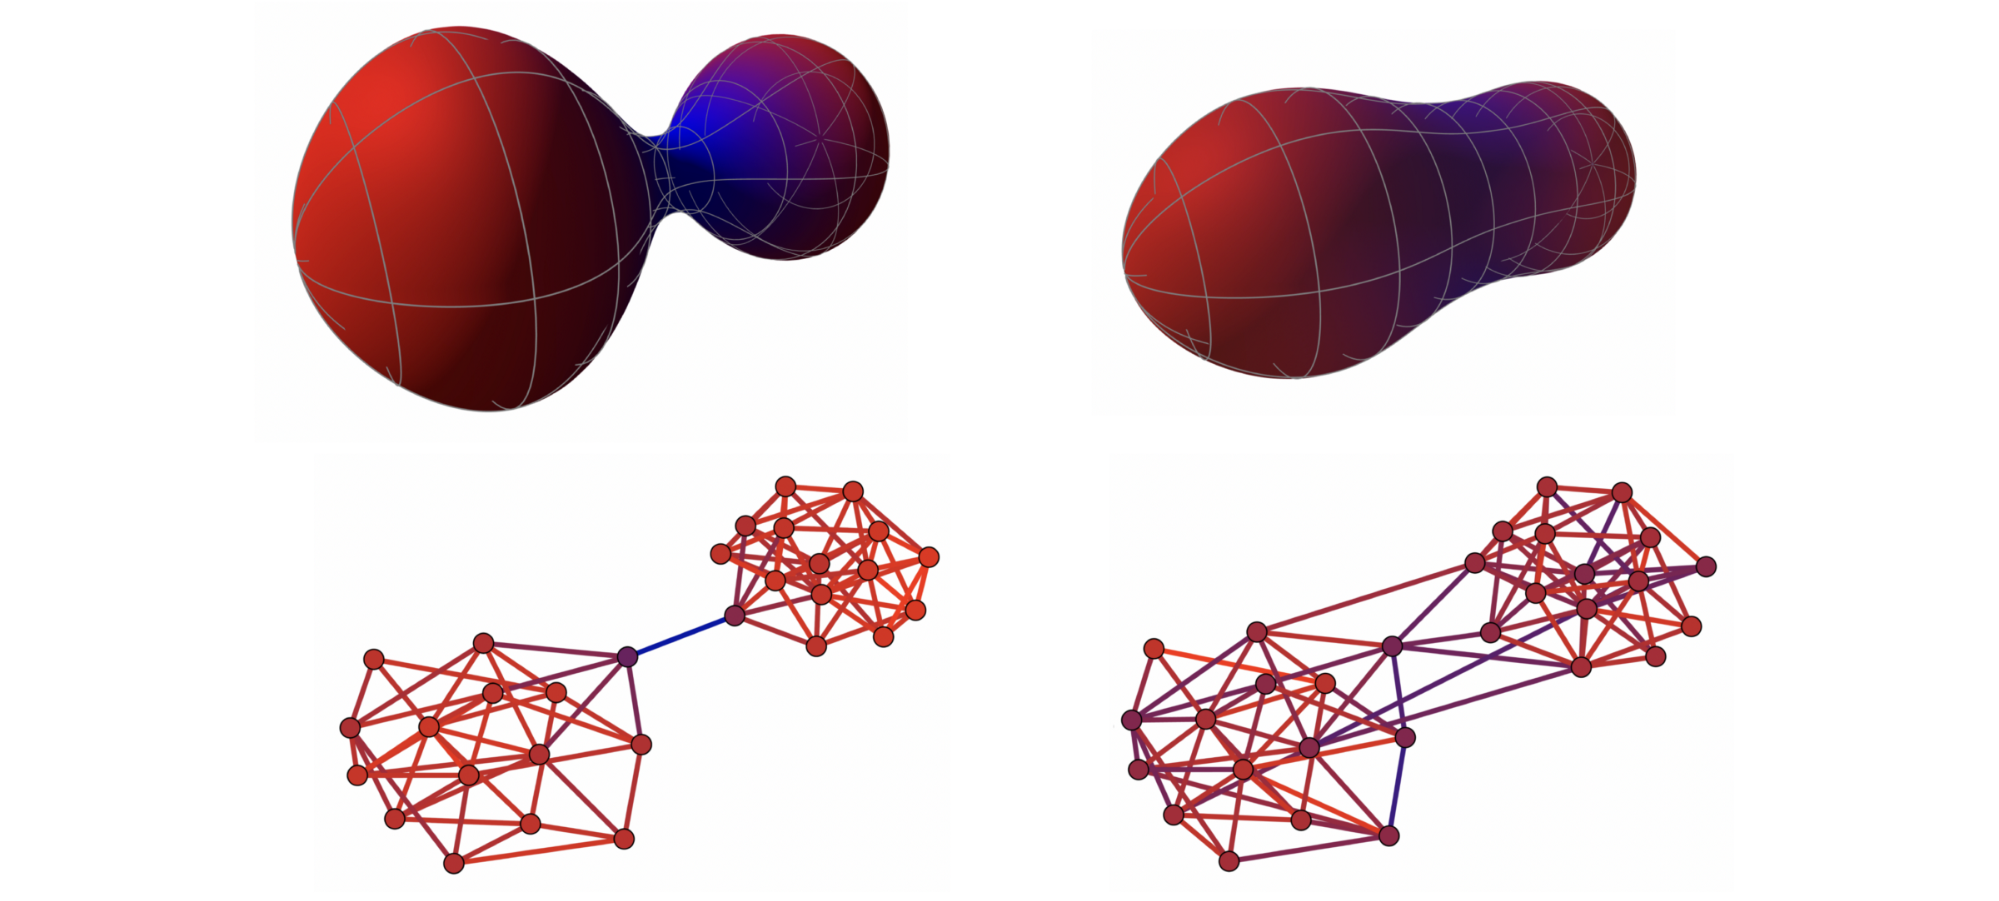

###some random calculations

In [39]:
edge_index = graph.edge_index
A = to_dense_adj(remove_self_loops(edge_index)[0])[0]
N = A.shape[0]
#G = to_networkx(data)
A = A.cuda()
C = torch.zeros(N, N).cuda()
added_edges = []
removed_edges = []

balanced_forman_curvature(A, C=C)

highest_curvature_edge = C.argmax().item()
print(highest_curvature_edge)

188131


In [40]:
print(balanced_forman_curvature(A, C=C))

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')


In [41]:
C

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [42]:
if C.any():
    # There is at least one non-zero value in the tensor C
    print("C contains non-zero values.")
else:
    # All values in the tensor C are zero
    print("C does not contain any non-zero values.")


C contains non-zero values.


In [43]:
non_zero_indices = torch.nonzero(C)
non_zero_values = C[non_zero_indices[:, 0], non_zero_indices[:, 1]]

print("Non-zero values in C:")
print(non_zero_values)


Non-zero values in C:
tensor([-0.9611, -0.1592, -1.2335,  ...,  0.8533, -0.2685,  0.1481],
       device='cuda:0')


In [44]:
C.argmax().item()

188131

In [45]:
mean_value = torch.mean(non_zero_values)

print("Mean of non-zero values in C:", mean_value.item())

Mean of non-zero values in C: -0.386600136756897


In [46]:
positive_values = non_zero_values[non_zero_values > 0]
smallest_positive_value = torch.min(positive_values)

print("Smallest positive value in C:", smallest_positive_value.item())

Smallest positive value in C: 0.005208328366279602


In [47]:
print(smallest_positive_value.item())

0.005208328366279602


In [48]:
smallest_threshold =  smallest_positive_value.item()
print(smallest_threshold)

0.005208328366279602


In [49]:
print(smallest_positive_value)

tensor(0.0052, device='cuda:0')


In [50]:
num_positive_values = positive_values.size(0)
print("Number of positive values in C:", num_positive_values)

Number of positive values in C: 2704


In [51]:
highest_positive_value = torch.max(positive_values)

print("Highest positive value in C:", highest_positive_value.item())

Highest positive value in C: 2.0


In [52]:
values_greater_than_one = non_zero_values[non_zero_values > 1]
smallest_values_greater_than_one = torch.min(values_greater_than_one)
print(smallest_values_greater_than_one)
num_values_greater_than_one = values_greater_than_one.size(0)
print("Number of values_greater_than_one values in C:", num_values_greater_than_one)

tensor(1.0208, device='cuda:0')
Number of values_greater_than_one values in C: 494


In [53]:
'''
for _ in range(loops):
        can_add = True

        # Calculate the Balanced Forman curvature of the graph
        balanced_forman_curvature(A, C=C)

        # Find the indices of edges with curvature values above the threshold
        above_threshold_indices = torch.nonzero(C > threshold)

'''

'\nfor _ in range(loops):\n        can_add = True\n\n        # Calculate the Balanced Forman curvature of the graph\n        balanced_forman_curvature(A, C=C)\n\n        # Find the indices of edges with curvature values above the threshold\n        above_threshold_indices = torch.nonzero(C > threshold)\n\n'

In [54]:
proma=torch.nonzero(C > smallest_threshold)


In [55]:
random_index = np.random.choice(proma.size(0))
print(' random_index ', random_index)
#print(' proma[random_index].item()  ',proma[random_index].item())

 random_index  1898


In [56]:
#proma[random_index].item()

In [57]:
proma[random_index]

tensor([1832,  291], device='cuda:0')

In [58]:
#random_index = np.random.choice(above_threshold_indices.size(0))
indices_____ = proma[random_index]
x, y = indices_____[0].item(), indices_____[1].item()
print(x,y)

1832 291


In [59]:
random_index = np.random.choice(positive_values.size(0))

In [60]:
random_index

1739

In [61]:
positive_values[random_index].item()

0.03999999538064003

`SDRF`

```# Define or import balanced_forman_curvature and balanced_forman_post_delta functions here.

# Set appropriate values for tau and num_positive_values.
tau = 1
num_positive_values = 0.5

# Create or load your graph data.
# data = ...

# Call your modified_sdrf function.
# modified_sdrf(data, loops, tau=tau, threshold=num_positive_values)

# You will also need to define or import the balanced_forman_curvature and balanced_forman_post_delta functions.

```
 This is formatted as code
```



##call SDRF for attack

In [62]:
import torch
import networkx as nx
import numpy as np
from torch_geometric.utils import to_networkx, to_dense_adj, remove_self_loops
from scipy.special import softmax

def modified_sdrf(data, loops, tau=1, threshold=smallest_threshold, is_undirected=True, remove_edges=True):
    edge_index = data.edge_index
    A = to_dense_adj(remove_self_loops(edge_index)[0])[0]
    N = A.shape[0]
    G = to_networkx(data)
    A = A.cuda()
    C = torch.zeros(N, N).cuda()

    added_edges = []
    removed_edges = []

    for _ in range(loops):
        can_add = True

        # Calculate the Balanced Forman curvature of the graph
        balanced_forman_curvature(A, C=C)

        # Find the indices of edges with curvature values above the threshold
        above_threshold_indices = torch.nonzero(C > threshold)

        # If no edge has a curvature above the threshold, break the loop
        if above_threshold_indices.size(0) == 0:
            can_add = False

        if can_add:
            # Randomly choose one edge from above_threshold_indices
            random_index = np.random.choice(above_threshold_indices.size(0))
            indicesRandomly = above_threshold_indices[random_index]
            x, y = indicesRandomly[0].item(), indicesRandomly[1].item()





            # Identify the neighbors of nodes x and y
            x_neighbors = list(G.neighbors(x)) + [x]
            y_neighbors = list(G.neighbors(y)) + [y]

            # Initialize variables to track the edge with the maximum improvement
            max_improvement = float('-inf')
            best_edge = None


            # Generate a list of candidate edges for potential addition
            candidates = []
            for i in x_neighbors:
                for j in y_neighbors:
                    if (i != j) and (not G.has_edge(i, j)):
                        candidates.append((i, j))

            if len(candidates):
                D = balanced_forman_post_delta(A, x, y, x_neighbors, y_neighbors)
                improvements = []

                # Iterate through candidate edges and calculate their improvements
                for (i, j) in candidates:
                    improvement = (D - C[x, y])[x_neighbors.index(i), y_neighbors.index(j)].item()

                # Check if the current edge has a higher improvement
                    if improvement > max_improvement:
                        max_improvement = improvement
                        best_edge = (i, j)

                if best_edge is not None:
                    k, l = best_edge

                    # Add the selected edge to the graph
                    G.add_edge(k, l)

                    # Update the adjacency matrix accordingly
                    A[k, l] = A[l, k] = 1
                    added_edges.append((k, l))

                else:
                    # No candidate edges available for addition
                    can_add = False


        else:
            can_add = False






    # Return the final modified graph in NetworkX format, added edges, and removed edges
    return from_networkx(G), added_edges

In [63]:
modified_graph, added_edges= modified_sdrf(graph, loops=loop_sdrf, tau=1, threshold  = smallest_threshold, is_undirected=True, remove_edges=True)



/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 11 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 3 will likely result in GPU under-utilization due t

In [64]:
added_edges

[(2191, 1810),
 (1020, 1298),
 (45, 227),
 (1510, 1306),
 (1822, 496),
 (2265, 2264),
 (2116, 1847),
 (2398, 70),
 (381, 1382),
 (238, 158),
 (2396, 168),
 (378, 556),
 (455, 576),
 (1153, 885),
 (663, 2458),
 (2039, 2061),
 (875, 568),
 (774, 506),
 (181, 110),
 (294, 107),
 (190, 396),
 (1457, 770),
 (10, 738),
 (1755, 1714),
 (2366, 1321),
 (1044, 50),
 (38, 1832),
 (2406, 1294),
 (1055, 1056),
 (392, 194),
 (265, 2406),
 (838, 1010),
 (2173, 1280),
 (855, 24),
 (31, 712),
 (1713, 1947),
 (2381, 1552),
 (773, 1457),
 (1211, 619),
 (1078, 1457),
 (697, 317),
 (578, 581),
 (634, 89),
 (1763, 145),
 (1098, 460),
 (380, 174),
 (1121, 1487),
 (169, 2234),
 (410, 2384),
 (482, 762),
 (637, 1119),
 (1031, 2442),
 (378, 557),
 (215, 337),
 (700, 732),
 (227, 235),
 (1994, 20),
 (2190, 623),
 (866, 1458),
 (13, 352),
 (1565, 437),
 (586, 585),
 (2145, 868),
 (243, 179),
 (1287, 31),
 (1667, 1095),
 (55, 532),
 (661, 1255),
 (208, 2271),
 (762, 1554),
 (1623, 441),
 (1182, 2086),
 (575, 2071)

In [65]:
len(added_edges)

1001

#modify orginal cora (attacked)

In [83]:
#added_edges

In [66]:
10138+1001

11139

In [67]:
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [68]:
old_edge_index = graph.edge_index
old_edge_index #old


tensor([[   0,    0,    0,  ..., 2484, 2484, 2484],
        [1084, 1104, 1288,  ..., 1184, 1255, 1894]])

In [69]:
num_nodes = graph.num_nodes

In [70]:
# Count the number of self-loops in the 'added_edge' list
self_loops_count = sum(1 for edge in added_edges if edge[0] == edge[1])

In [71]:
self_loops_count

0

In [72]:
added_edges = torch.tensor(added_edges, dtype=torch.long)

In [73]:
added_edges

tensor([[2191, 1810],
        [1020, 1298],
        [  45,  227],
        ...,
        [ 296,   63],
        [1551, 2066],
        [1601, 1983]])

In [74]:
old_edge_index.shape

torch.Size([2, 10138])

In [75]:
added_edges.shape

torch.Size([1001, 2])

In [76]:

# Add edges from the 'added_edge' list
new_edge_index = torch.cat((edge_index, added_edges.T), 1)


In [77]:
new_edge_index

tensor([[   0,    0,    0,  ...,  296, 1551, 1601],
        [1084, 1104, 1288,  ...,   63, 2066, 1983]])

In [78]:
new_edge_index.shape

torch.Size([2, 11139])

In [79]:
x = graph.x #features

In [80]:
y = graph.y #lables

In [81]:
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [82]:
graph.train_mask

tensor([False, False, False,  ..., False, False, False])

In [84]:
# Access the original attributes from the dataset
x = graph.x
y = graph.y
train_mask = graph.train_mask
val_mask = graph.val_mask
test_mask = graph.test_mask

# Create a new Data object with the modified edge_index and the original attributes
attacked_graph = Data(x=x, y=y, edge_index=new_edge_index, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)

In [85]:
attacked_graph

Data(x=[2485, 1433], edge_index=[2, 11139], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [ ]:
'''
A---B
|\  |
| \ |
|  \|
C---D
'''

In [ ]:
'''

A---B
|\  |
| \ |
|  \|
C---D

'''

#modify orginal cora (attacked)

The provided code is intended to update a PyTorch Geometric `Data` object to remove specific edges and add new edges while keeping the rest of the dataset intact. Here's an explanation of the code:

1. **Clone Original Data:**
   ```python
   updated_data = graph.clone()
   ```
   This line creates a deep copy of your original `graph` object and stores it in `updated_data`. Cloning is necessary to ensure that the original dataset remains unchanged while you make modifications to `updated_data`.

2. **Remove Specified Edges:**
   ```python
   for edge in removed_edges:
       mask = ((updated_data.edge_index[0] != edge[0]) | (updated_data.edge_index[1] != edge[1]))
       updated_data.edge_index = updated_data.edge_index[:, mask]
   ```
   This loop iterates through each edge in the `removed_edges` list. For each edge, it creates a boolean mask using logical operations. The mask is designed to exclude the specific edge being removed. It checks if each edge in `updated_data.edge_index` is different from the edge to be removed. The resulting mask selects all edges except the ones that need to be removed. The original `edge_index` is then updated with this filtered subset of edges.

3. **Add Specified Edges:**
   ```python
   updated_data.edge_index = torch.cat([updated_data.edge_index, torch.tensor(added_edges, dtype=torch.long).t()], dim=1)
   ```
   This line appends the new edges specified in the `added_edges` list to the `edge_index` of the `updated_data` object. It converts `added_edges` to a PyTorch tensor, transposes it, and then concatenates it with the existing `edge_index` along `dim=1`, effectively adding the new edges to the graph.

After executing this code, `updated_data` will contain the same node features and attributes as the original `graph` but with specific edges removed and added as per your requirements. The rest of the dataset remains intact, which aligns with your stated goal.


In [86]:
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [87]:
attacked_graph

Data(x=[2485, 1433], edge_index=[2, 11139], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [111]:
'''import torch
from torch_geometric.data import Data

# Create a copy of your original data
attacked_graph = graph.clone()



# Remove the specified edges from the edge_index
for edge in removed_edges:
    mask_ = ((attacked_graph.edge_index[0] != edge[0]) | (attacked_graph.edge_index[1] != edge[1]))
    attacked_graph.edge_index = attacked_graph.edge_index[:, mask_]

# Add the specified edges to the edge_index
attacked_graph.edge_index = torch.cat([attacked_graph.edge_index, torch.tensor(added_edges, dtype=torch.long).t()], dim=1)
'''

<ipython-input-111-b5e3c61c7624>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attacked_graph.edge_index = torch.cat([attacked_graph.edge_index, torch.tensor(added_edges, dtype=torch.long).t()], dim=1)


In [ ]:
'''import torch
from torch_geometric.data import Data

# Create a copy of your original data
attacked__graph = graph.clone()

# Remove the specified edges from the edge_index
for edge in removed_edges:
    mask_ = ((attacked__graph.edge_index[0] != edge[0]) | (attacked__graph.edge_index[1] != edge[1]))
    if mask_.any():
        attacked__graph.edge_index = attacked__graph.edge_index[:, mask_]
#attacked_graph
# Add the specified edges to the edge_index, ensuring no duplicates
added_edges_set = set(added_edges)
added_edges_to_add = [edge for edge in added_edges if edge not in added_edges_set]

if len(added_edges_to_add) > 0:
    attacked__graph.edge_index = torch.cat([attacked__graph.edge_index, torch.tensor(added_edges_to_add, dtype=torch.long).t()], dim=1)
'''

##final modified attacked dataset visualise

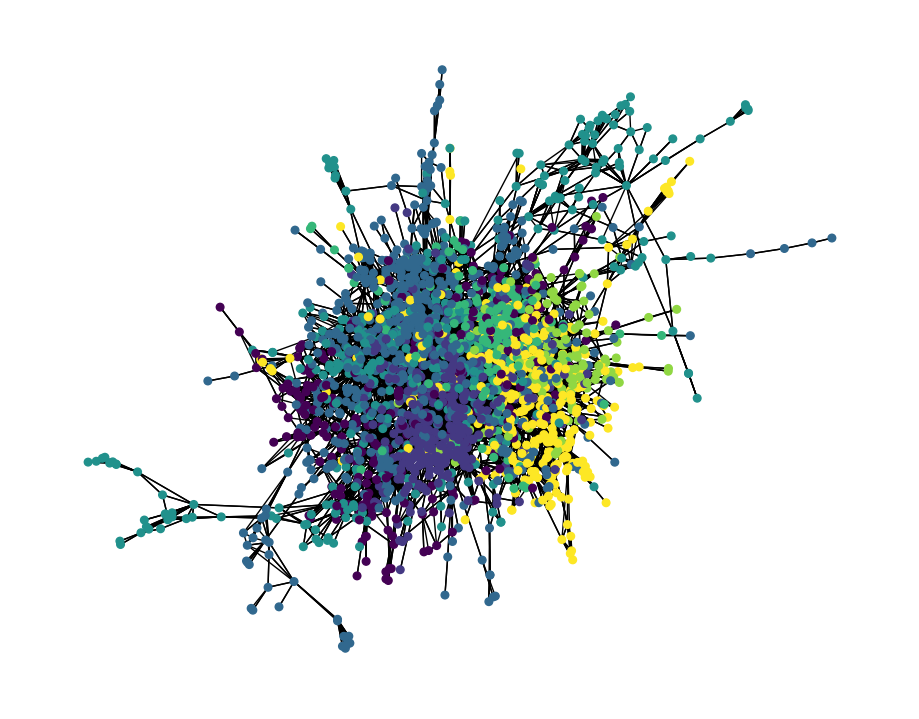

In [88]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx

def convert_to_networkx(attacked_graph, n_sample=None):

    G = to_networkx(attacked_graph, node_attrs=["x"])
    y = attacked_graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        G = G.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return G, y


def plot_graph(G, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(G, node_size=30, arrows=False, node_color=y)
    plt.show()


G, y = convert_to_networkx(attacked_graph)
plot_graph(G, y)

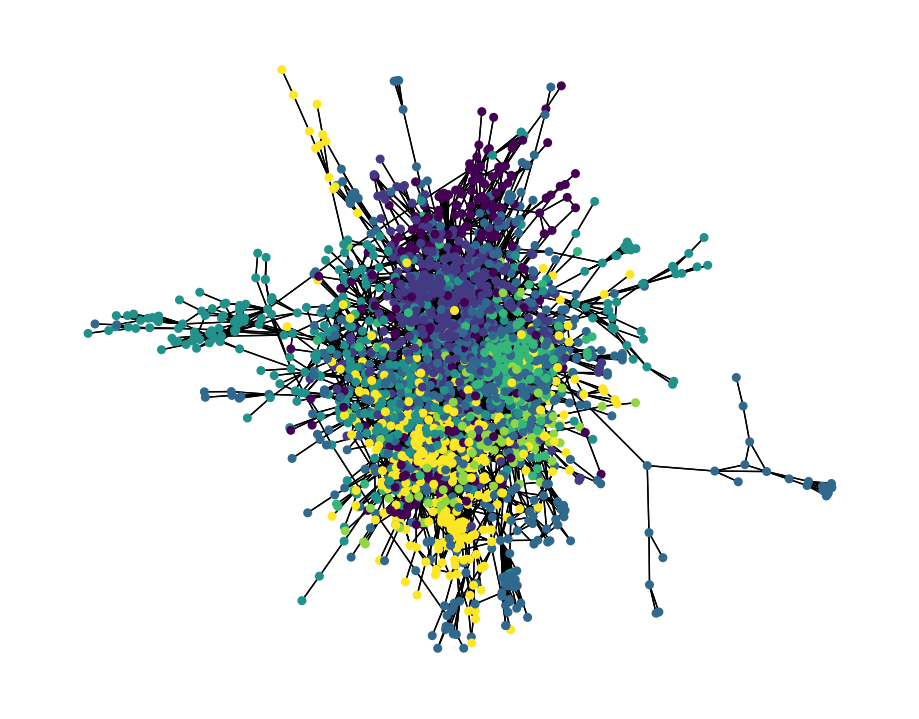

In [115]:
'''import random
from torch_geometric.utils import to_networkx
import networkx as nx

def convert_to_networkx(attacked_graph, n_sample=None):

    G = to_networkx(attacked_graph, node_attrs=["x"])
    y = attacked_graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        G = G.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return G, y


def plot_graph(G, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(G, node_size=30, arrows=False, node_color=y)
    plt.show()


G1, y1 = convert_to_networkx(attacked_graph)
plot_graph(G1, y1)'''

'import random\nfrom torch_geometric.utils import to_networkx\nimport networkx as nx\n\ndef convert_to_networkx(attacked_graph, n_sample=None):\n\n    G = to_networkx(attacked_graph, node_attrs=["x"])\n    y = attacked_graph.y.numpy()\n\n    if n_sample is not None:\n        sampled_nodes = random.sample(g.nodes, n_sample)\n        G = G.subgraph(sampled_nodes)\n        y = y[sampled_nodes]\n\n    return G, y\n\n\ndef plot_graph(G, y):\n\n    plt.figure(figsize=(9, 7))\n    nx.draw_spring(G, node_size=30, arrows=False, node_color=y)\n    plt.show()\n\n\nG1, y1 = convert_to_networkx(attacked_graph)\nplot_graph(G1, y1)'

In [89]:
G

In [90]:
attacked_graph

Data(x=[2485, 1433], edge_index=[2, 11139], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [91]:
attacked_adj = attacked_graph.edge_index.t() ## Get the adjacency matrix,
attacked_adj

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [ 296,   63],
        [1551, 2066],
        [1601, 1983]])

In [92]:
attacked_adj.shape

torch.Size([11139, 2])

In [93]:
attacked_graph

Data(x=[2485, 1433], edge_index=[2, 11139], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [94]:
attacked__features = attacked_graph.x
print(attacked__features)
attacked__labels = attacked_graph.y
print(attacked__labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 2, 0,  ..., 2, 2, 2])


In [95]:
print(f"Number of nodes: {attacked_graph.num_nodes}")
print(f"Number of edges: {attacked_adj.size(0)}")


Number of nodes: 2485
Number of edges: 11139


In [96]:
#you should divide the total number of edges by 2 to get the actual number of unique edges in your undirected graph.

In [97]:
print(f'Number of edges: {attacked_graph.num_edges}')
# Number of edges: 10556

Number of edges: 11139


In [98]:
10637/2

5318.5

In [99]:

print(f'Actual number of edges: {attacked_graph.num_edges // 2}')


Actual number of edges: 5569


In [100]:
# Get the train, validation, and test indices
#idx_train = attacked_graph.train_mask.nonzero().view(-1)
idx_train = attacked_graph.train_mask.nonzero().view(-1)
idx_val = attacked_graph.val_mask.nonzero().view(-1)
idx_test = attacked_graph.test_mask.nonzero().view(-1)


print(f"Number of features per node: {attacked__features.size(1)}")
print(f"Number of classes: {int(attacked__labels.max()) + 1}")
print(f"Number of training nodes: {len(idx_train)}")
print(f"Number of validation nodes: {len(idx_val)}")
print(f"Number of test nodes: {len(idx_test)}")

Number of features per node: 1433
Number of classes: 7
Number of training nodes: 247
Number of validation nodes: 249
Number of test nodes: 1988




```
in original planetoid dataset
Number of nodes: 10556
Number of edges: 13820218
Number of features per node: 1433
Number of classes: 7
Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000
```



#GCN using modified graph

In [101]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear, BatchNorm1d

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.bn1 = BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm1d(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.bn3 = BatchNorm1d(hidden_channels)
        self.conv4 = GCNConv(hidden_channels, hidden_channels)
        self.bn4 = BatchNorm1d(hidden_channels)
        self.out = Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        # First Message Passing Layer (Transformation)
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Second Message Passing Layer
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Third Message Passing Layer
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Fourth Message Passing Layer
        x = self.conv4(x, edge_index)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Output layer
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return x



Epoch 500/5000:
Train Loss: 1.1717, Train Accuracy: 0.9757, Train Precision: 0.9757, Train Recall: 0.9757
Validation Loss: 1.4308, Validation Accuracy: 0.7550, Validation Precision: 0.7550, Validation Recall: 0.7550
Test Loss: 1.4494, Test Accuracy: 0.7289, Test Precision: 0.7289, Test Recall: 0.7289

Epoch 1000/5000:
Train Loss: 1.1717, Train Accuracy: 0.9757, Train Precision: 0.9757, Train Recall: 0.9757
Validation Loss: 1.4254, Validation Accuracy: 0.7390, Validation Precision: 0.7390, Validation Recall: 0.7390
Test Loss: 1.4503, Test Accuracy: 0.7274, Test Precision: 0.7274, Test Recall: 0.7274

Epoch 1500/5000:
Train Loss: 1.1710, Train Accuracy: 0.9757, Train Precision: 0.9757, Train Recall: 0.9757
Validation Loss: 1.4180, Validation Accuracy: 0.7791, Validation Precision: 0.7791, Validation Recall: 0.7791
Test Loss: 1.4262, Test Accuracy: 0.7414, Test Precision: 0.7414, Test Recall: 0.7414

Epoch 2000/5000:
Train Loss: 1.1695, Train Accuracy: 0.9798, Train Precision: 0.9798, Tra

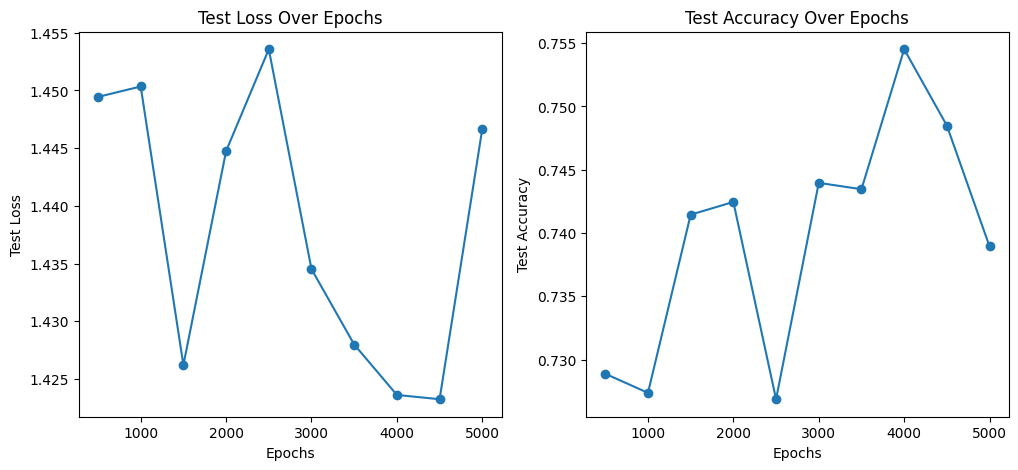

In [102]:
#attacked_graph

import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the model and optimizer
num_features = attacked__features.size(1)
num_classes = int(attacked__labels.max()) + 1
hidden_channels = 64  # You can adjust this as needed
model = GCN(num_features, hidden_channels, num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define a function for evaluation
def evaluate(model, attacked_features,adj,attacked_labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(attacked_features, adj.t())
        logits = logits[mask]
        attacked_labels = attacked_labels[mask]
        pred = logits.max(1)[1]
        accuracy = accuracy_score(attacked_labels, pred)
        precision = precision_score(attacked_labels, pred, average='micro')
        recall = recall_score(attacked_labels, pred, average='micro')
        return accuracy, precision, recall

# Training loop
num_epochs = 5000
train_losses = []
val_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()
    logits = model(attacked__features, adj.t())
    loss = F.cross_entropy(logits[idx_train], attacked__labels[idx_train])
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        train_loss = loss.item()
        val_loss = F.cross_entropy(logits[idx_val], attacked__labels[idx_val]).item()
        test_loss = F.cross_entropy(logits[idx_test], attacked__labels[idx_test]).item()

        train_accuracy, train_precision, train_recall = evaluate(model, attacked__features,attacked_adj,attacked__labels, idx_train)
        val_accuracy, val_precision, val_recall = evaluate(model, attacked__features,attacked_adj,attacked__labels, idx_val)
        test_accuracy, test_precision, test_recall = evaluate(model, attacked__features,attacked_adj,attacked__labels, idx_test)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        test_losses.append(test_loss)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}")
        print("")


# Plot test loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(500, num_epochs + 1, 500), test_losses, marker='o')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')

plt.subplot(1, 2, 2)
plt.plot(range(500, num_epochs + 1, 500), test_accuracies, marker='o')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()




```
The results suggest that the test accuracy remains constant at 0.73505 for all epochs.**bold text**
```



In [103]:
test_accuracies

[0.7288732394366197,
 0.727364185110664,
 0.7414486921529175,
 0.7424547283702213,
 0.7268611670020121,
 0.743963782696177,
 0.7434607645875252,
 0.7545271629778671,
 0.7484909456740443,
 0.7389336016096579]

In [104]:
# Calculate the average using NumPy's .mean() method
average_test_accuracy = np.mean(test_accuracies)

# Print the average test accuracy
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")

Average Test Accuracy: 0.7396


In [105]:
test_losses

[1.4494377374649048,
 1.4503428936004639,
 1.426205039024353,
 1.444745421409607,
 1.4535714387893677,
 1.4345154762268066,
 1.4279800653457642,
 1.4236125946044922,
 1.423240303993225,
 1.4466626644134521]

In [106]:
# Calculate the average using NumPy's .mean() method
average_test_losses = np.mean(test_losses)

# Print the average test accuracy
print(f"Average Test Accuracy: {average_test_losses:.4f}")

Average Test Accuracy: 1.4380


#ufrue